# Importing the data

In [1]:
import pandas as pd
import json
with open('test01.json') as f:
    data = json.load(f)

<br>
<b>The dataset is being split into both AI generated and Human generated parts respectively for ease of analysis.</b>
</br>

In [2]:
df1 = pd.DataFrame(data)
df1 = df1.rename(columns={0: "file"})
df1 = df1.assign(label=1)
for i in range(100,200):
    df1.label[i] = 0
df = df1.reindex()

C:\Users\adity\AppData\Local\Temp\ipykernel_9380\2560240892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[i] = 0


<br>
<h5> A quick view of the dataset. If u will. </h5>
</br>

In [3]:
df.describe()

,label
count,200.000000
mean,0.500000
std,0.501255
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [4]:
df.describe

<bound method NDFrame.describe of                                                   file  label
0    In the Texas Court of Criminal Appeals under c...      1
1    IN THE COURT OF CRIMINAL APPEALS OF TEXAS, CAS...      1
2    In the Criminal Appeals Court of Texas, two se...      1
3    In the Texas Court of Criminal Appeals case nu...      1
4    In the Texas Court of Criminal Appeals, Case N...      1
..                                                 ...    ...
195  Nebraska Supreme Court Online Library\nwww.neb...      0
196  Nebraska Supreme Court Online Library\nwww.neb...      0
197  Nebraska Supreme Court Online Library\nwww.neb...      0
198  Nebraska Supreme Court Online Library\nwww.neb...      0
199  NOTICE: Summary decisions issued by the Appeal...      0

[200 rows x 2 columns]>

<br>
<i> The dataframe obtained must be split with the context of label to differentiate between AI and Human generated data </i>
</br>

In [5]:
#Label of 1 to be assigned as AI generated data
df_label_ai = df[df['label']==1]
#Label of 0 to be assigned as Human written data
df_label_human = df[df['label']==0]

In [14]:
#Converting the files to json respectively:

In [15]:
df_label_ai.to_json('label_1_ai.json', orient = 'records')

In [16]:
df_label_human.to_json('label_0_human.json', orient = 'records')

<br>
<i> Let us now perform some N-gram analysis on the data to gain insights on the bi-grams ferquently occuring </i>
</br>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

<i><b> AI generated Document data

In [23]:
def get_top_n_grams(corpus, ngram_range=(2,4), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#Loading the file data
file_path = 'label_1_ai.json'
with open(file_path, 'r') as file:
    text_data = file.read().splitlines()

# Each row in the dataframe is a different case file:
df = pd.DataFrame(text_data, columns=['file'])

# Generation of top Bigrams:
top_bigrams = get_top_n_grams(df['file'], ngram_range=(2, 4), n=3)
print("the top3 bigrams are: ")
print(top_bigrams)

the top3 bigrams are: 
[('district court', 209), ('trial court', 160), ('united states', 139)]


<b><i> Human generated Documents </b>

In [59]:
def get_top_n_grams(corpus, ngram_range=(2,4), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#Loading the file data
file_path = 'label_0_human.json'
with open(file_path, 'r') as file:
    text_data = file.read().splitlines()

# Each row in the dataframe is a different case file:
df = pd.DataFrame(text_data, columns=['file'])

# Generation of top Bigrams:
top_bigrams = get_top_n_grams(df['file'], ngram_range=(2,2), n=3)
print("the top3 bigrams are: ")
print(top_bigrams)

the top3 bigrams are: 
[('trial court', 685), ('district court', 473), ('court u2019s', 369)]


<b><i> Plotting the bar graph of the N-gram analysis

<p>
    N-gram analysis is a method that is used in Text analysis, where the model considers a sequence of 'N' items from the given sample of text. The purpose in performing N-gram analysis could be:
    <li>
    Prediction of next item in the sequence.
    <li>
    To understand the context.
    <li>
    Or to analyze the text patterns.
    </li>
</p>

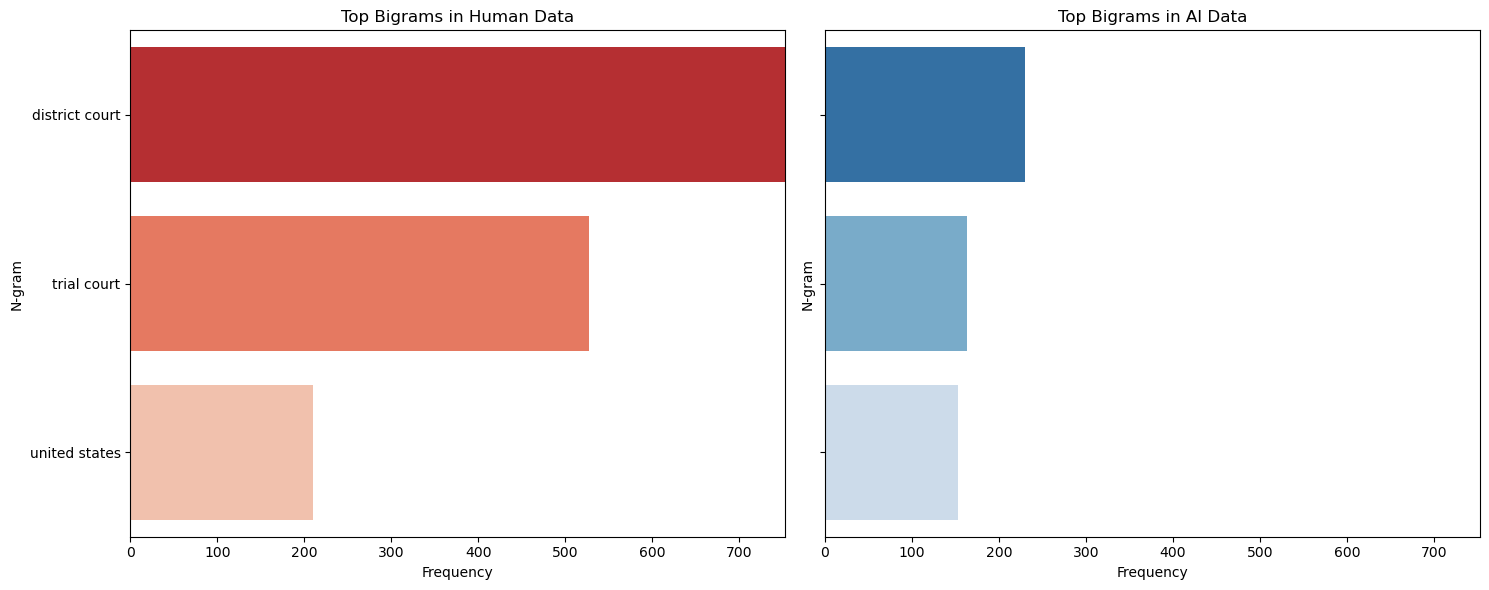

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to get top N-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=3):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Prepare data for plotting
def prepare_data_for_plotting(human_data, ai_data, top_n=3):
    human_top_ngrams = get_top_ngrams(human_data, top_n=top_n)
    ai_top_ngrams = get_top_ngrams(ai_data, top_n=top_n)
    
    # Combine and label the data
    combined_data = human_top_ngrams + ai_top_ngrams
    df = pd.DataFrame(combined_data, columns=['N-gram', 'Frequency'])
    df['Dataset'] = ['Human'] * top_n + ['AI'] * top_n
    return df

# Cleaning data (removing NaNs)
df_human_clean = df_label_human.dropna(subset=['file'])
df_ai_clean = df_label_ai.dropna(subset=['file'])

# Convert to lowercase for consistency
df_human_clean['file'] = df_human_clean['file'].apply(lambda x: x.lower())
df_ai_clean['file'] = df_ai_clean['file'].apply(lambda x: x.lower())

# Prepare the data for plotting
top_n = 3
df_plotting = prepare_data_for_plotting(df_human_clean['file'], df_ai_clean['file'], top_n=top_n)

# Find max frequency to set x-axis limits
max_freq = df_plotting['Frequency'].max()

# Plot using subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Human data
sns.barplot(ax=axes[0], x="Frequency", y="N-gram", data=df_plotting[df_plotting['Dataset'] == 'Human'], palette="Reds_r")
axes[0].set_title("Top Bigrams in Human Data")
axes[0].set_xlim(0, max_freq)  # Set the same x-axis limits

# Plot for AI data
sns.barplot(ax=axes[1], x="Frequency", y="N-gram", data=df_plotting[df_plotting['Dataset'] == 'AI'], palette="Blues_r")
axes[1].set_title("Top Bigrams in AI Data")
axes[1].set_xlim(0, max_freq)  # Set the same x-axis limits

plt.tight_layout()
plt.show()


<h5> The conclusive analysis from the above graph </h5>
<br>
<p> 
    From, the n-gram analysis, we find that the words "district court", "trial court" and "united states" frequently occur. We understand that the documents present in the data are law proceedings from the United States and that they belong to trial and district courts respectively.
</p>
<p>
    From the graph, In case of human generated text, the word "district court" occurs frequently and more often as the verbosity count for a human is theoretically unlimited.
    But for a AI model the output is restricted to limited amount of tokens.
</p>

<b>
    <i> Analysis through Histograms </i>
</b>
<br>
<p>
    In the context of text data analysis, histograms are particularly useful for visualizing the frequency distribution of various quantitative aspects of the text. 
</p>
<br>
<p>
    In our case we are concerned about the Maximum length of words for each of the datasets.
</p>

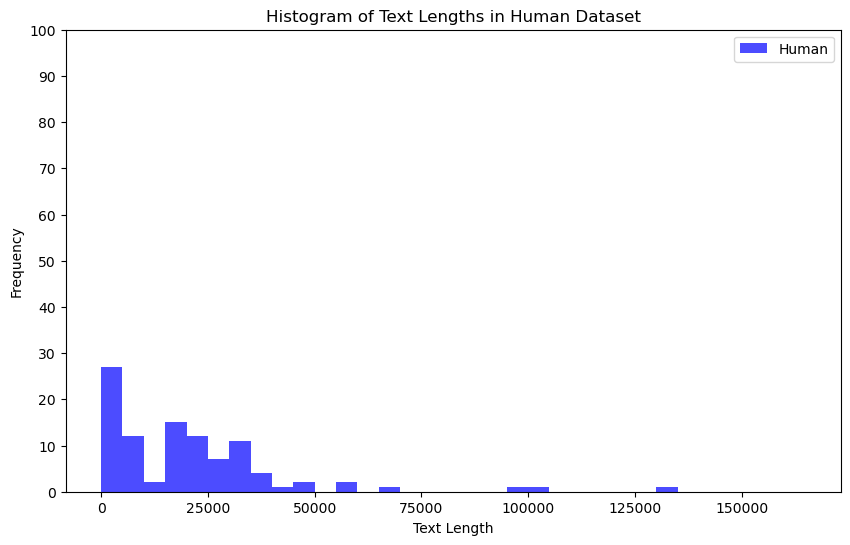

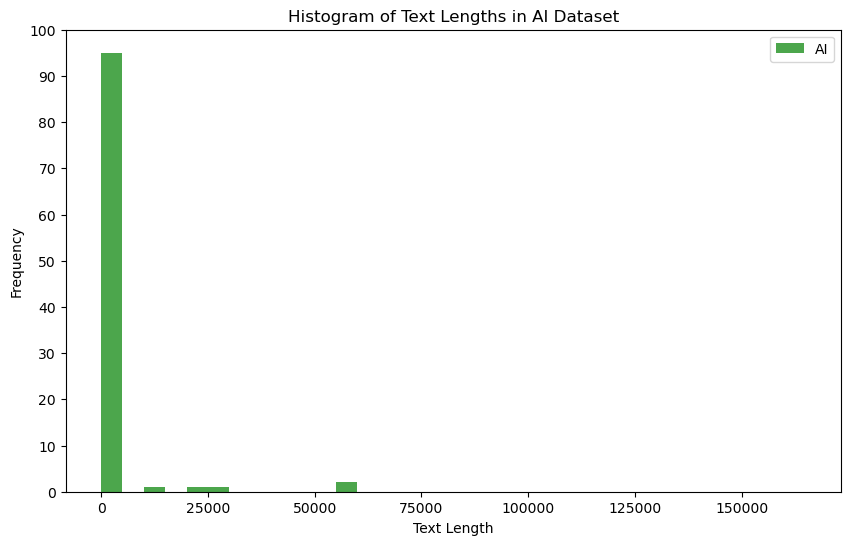

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the text length for each entry in the human dataset
df_human_clean['text_length'] = df_human_clean['file'].apply(len)

# Calculate the text length for each entry in the AI dataset
df_ai_clean['text_length'] = df_ai_clean['file'].apply(len)

# Determine the common Y-axis range
common_bin_edges = range(0, max(df_human_clean['text_length'].max(), df_ai_clean['text_length'].max()) + 1000, 5000)
max_freq = max(df_human_clean['text_length'].value_counts().max(), 
               df_ai_clean['text_length'].value_counts().max())

y_ticks = np.arange(0, 101, 10)  # From 0 to 100 with steps of 10

# Histogram for the Human dataset with common Y-axis range
plt.figure(figsize=(10, 6))
plt.hist(df_human_clean['text_length'], bins=common_bin_edges, alpha=0.7, color='blue', label='Human')
plt.title('Histogram of Text Lengths in Human Dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.yticks(y_ticks)
plt.ylim(0, 100)  # Set common Y-axis range
plt.legend()
plt.show()

# Histogram for the AI dataset with common Y-axis range
plt.figure(figsize=(10, 6))
plt.hist(df_ai_clean['text_length'], bins=common_bin_edges, alpha=0.7, color='green', label='AI')
plt.title('Histogram of Text Lengths in AI Dataset')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.yticks(y_ticks)
plt.ylim(0, 100)  # Set common Y-axis range
plt.legend()
plt.show()


<b>
    <i> Results obtained from the histograms are as follows: </i> </b>
<br>
<p>
    In the case of human written data: As human lawyers draw up legal documents, it tends to be more verbose, they consider multiple contexts/scenarios of the case and include defensive arguments from all aspects. And there is no limit of verbosity for Humans.
    Maximum number of words: 129000 characters and Average of 25000 characters in each document.
</p>
<p>
   In the case of AI generated text: It is limited to the number of tokens of the LLM model.Hence, the output of the tokens is limited. The limited word count can be seen in the histogram as more number of documents portray less than 15000 characters for an average document. Maximum number of characters in this set is 60000 characters.
</p>

<b>
    <i> Co-Occurence Matrix </i> 
</b>
<p>
    It portrays how many times or frequency of occurence of pairs of words in the same context. In our case, it does the expected and shows us how often a pair of word(s) occurs which emphasizes the context and how specific is the document in terms of the topic.
</p>

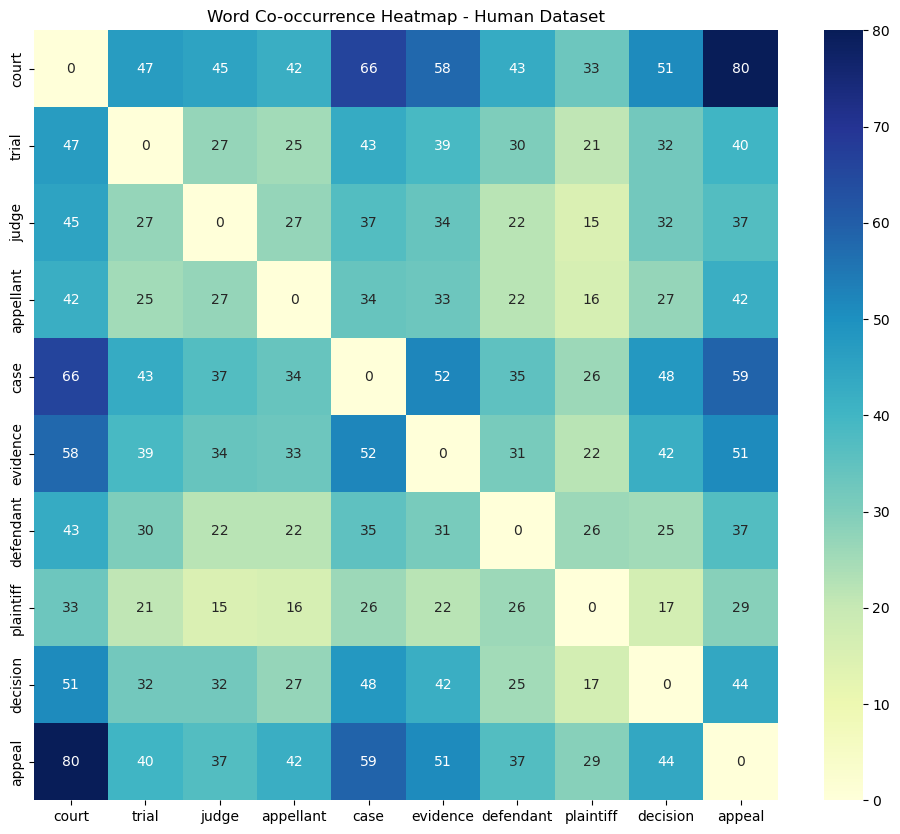

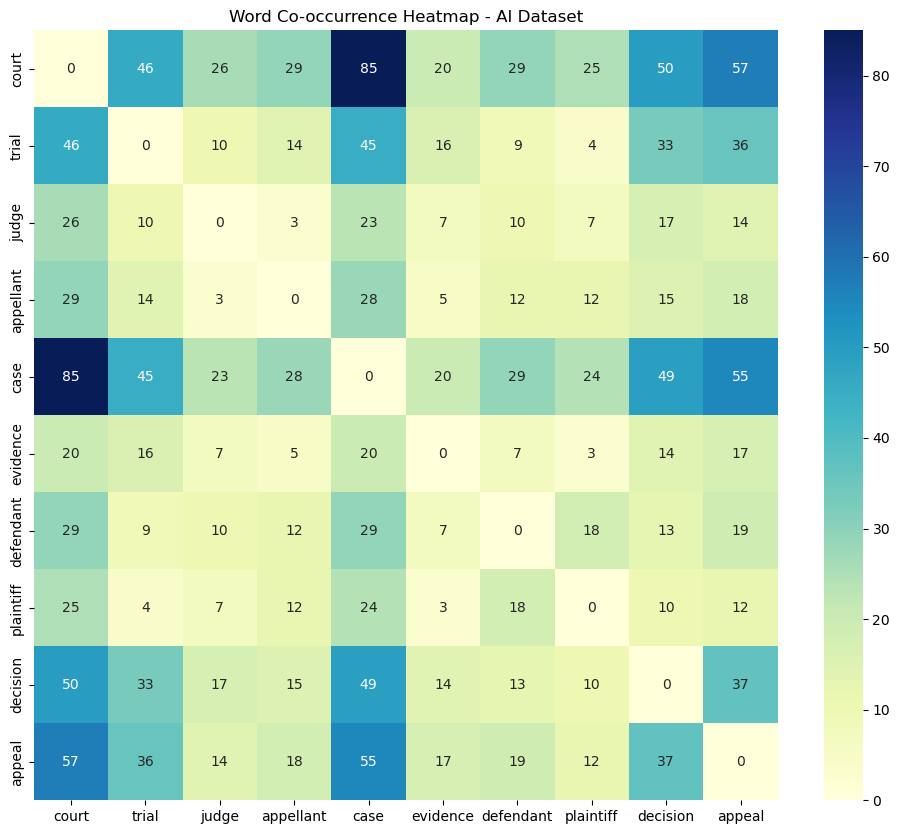

In [51]:
import numpy as np
import seaborn as sns

# Function to calculate co-occurrence matrix
def co_occurrence_matrix(corpus, word_list):
    # Create a dictionary with each word count set to 0
    word_count = {word: 0 for word in word_list}
    co_occurrence = {word: word_count.copy() for word in word_list}

    for text in corpus:
        words = text.split()
        for word in word_list:
            if word in words:
                for co_word in word_list:
                    if co_word in words and co_word != word:
                        co_occurrence[word][co_word] += 1

    return co_occurrence

# Selecting a subset of frequent words for demonstration
# For a more comprehensive analysis, you can select words based on your specific criteria
subset_words = ['court', 'trial', 'judge', 'appellant', 'case', 'evidence', 'defendant', 'plaintiff', 'decision', 'appeal']

# Calculating co-occurrence matrix for human dataset
human_corpus = df_human_clean['file'].astype(str).tolist()
human_co_occurrence = co_occurrence_matrix(human_corpus, subset_words)

# Calculating co-occurrence matrix for AI dataset
ai_corpus = df_ai_clean['file'].astype(str).tolist()
ai_co_occurrence = co_occurrence_matrix(ai_corpus, subset_words)

# Convert to DataFrame for visualization
human_co_matrix_df = pd.DataFrame(human_co_occurrence)
ai_co_matrix_df = pd.DataFrame(ai_co_occurrence)

# Creating heatmaps
plt.figure(figsize=(12, 10))
plt.title("Word Co-occurrence Heatmap - Human Dataset")
sns.heatmap(human_co_matrix_df, annot=True, cmap="YlGnBu", fmt="d")
plt.show()

plt.figure(figsize=(12, 10))
plt.title("Word Co-occurrence Heatmap - AI Dataset")
sns.heatmap(ai_co_matrix_df, annot=True, cmap="YlGnBu", fmt="d")
plt.show()



<b><i> Remarks from the visualization: </i></b>
<p>
    In Human dataset: Case and evidence occur more together in Human dataset, as we can form context more vividly as compared to Generative AI. As humans tend to focus more on the appellant and their evidence with a specific context.
</p>
<p>
     Conversely, In the AI generated data, we observe the occurence of appellant and evidence do not occur so often as that of in the human written data, as AI models (LLM's) tend to deviate from the context and represent data in an open-ended and generic way. But this does not work in the case of law. As legal documents focus on the specifics of the situation rather than an ambiguous situation.
</p>